In [1]:
import math
import numpy as np
from scipy.stats import beta
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# this will make plots a little bit prettier
sns.set(style='darkgrid')
sns.set_context('talk')

# BAYESIAN PRIORS AND WORKING WITH PROBABILITY DISTRIBUTION

Before moving to exercises let's get familiar with plotting an example which was introduced throughout the chapter.

C-3PO's data: 

- 2 people survived and 7440 people exploded (alpha likelihood, beta likelihood)

Our believe in Han Solo being badass: 

- Han Solo will survive with probability of 20 000 : 1 (alpha prior, beta_prior)

In [2]:
alpha_l = 2      # alpha likelihood
alpha_p = 20000  # alpha prior
beta_l = 7400    # beta likelihood
beta_p = 1      # alpha prior

num_of_trials = 1000   # number of times we will simulate an event

Let's plot C-3PO's data first

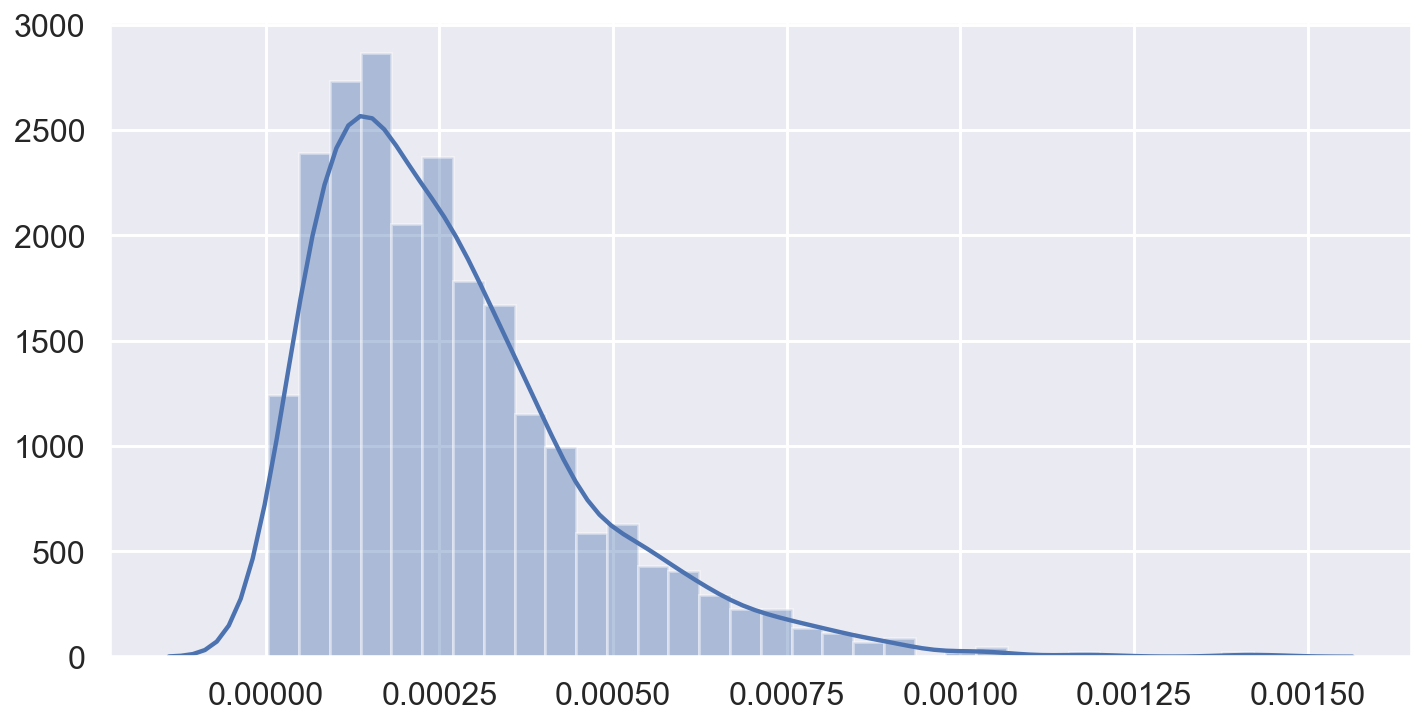

In [3]:
r = beta.rvs(alpha_l, beta_l, loc=0, scale=1, size=num_of_trials)

# few style changes to make plot prettier
plt.figure(figsize=(12,6), dpi=140)

sns.distplot(r)

Now our believes about Han Solo

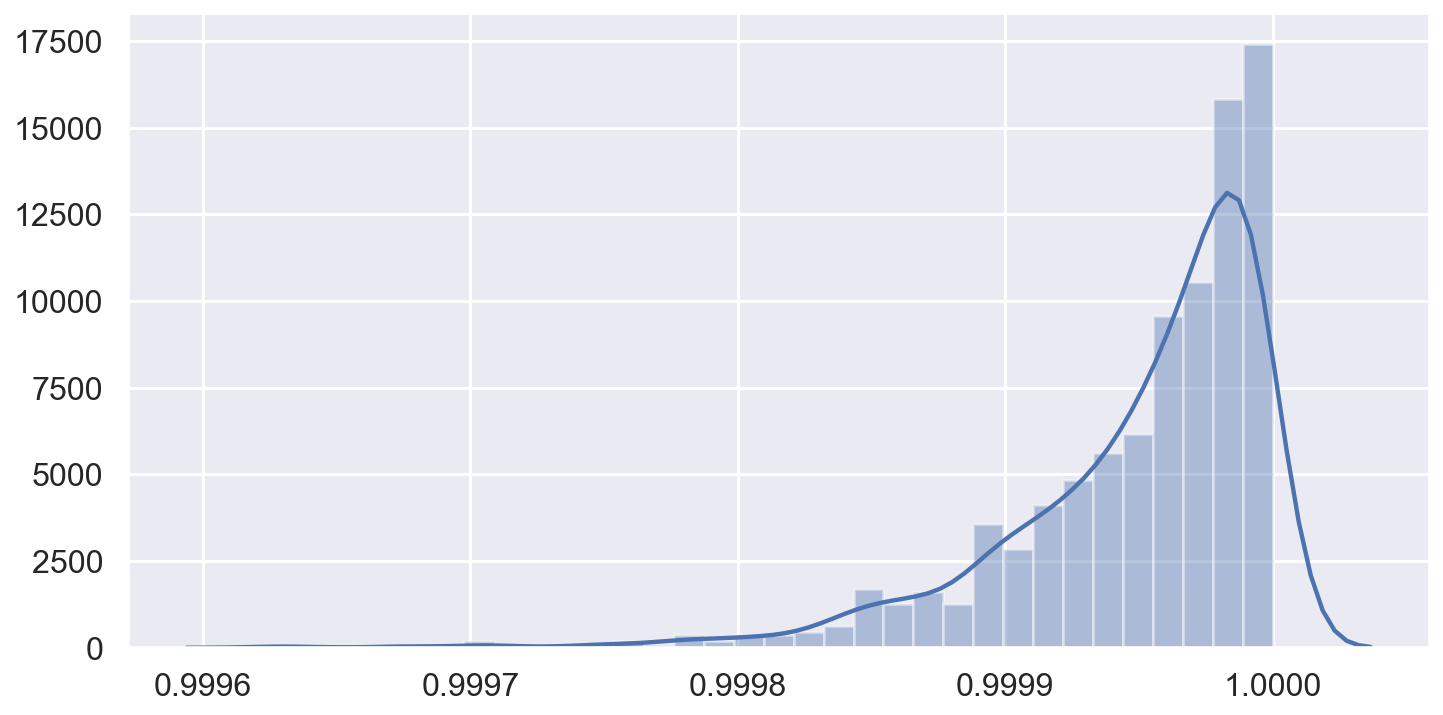

In [4]:
r2 = beta.rvs(alpha_p, beta_p, loc=0, scale=1, size=num_of_trials)
plt.figure(figsize=(12,6), dpi=140)
sns.distplot(r2)

Finally the plot which combines our likelihood with prior

In [5]:
alpha_c = alpha_l + alpha_p
beta_c = beta_l + beta_p
r3 = beta.rvs(alpha_c, beta_c, loc=0, scale=1, size=num_of_trials)

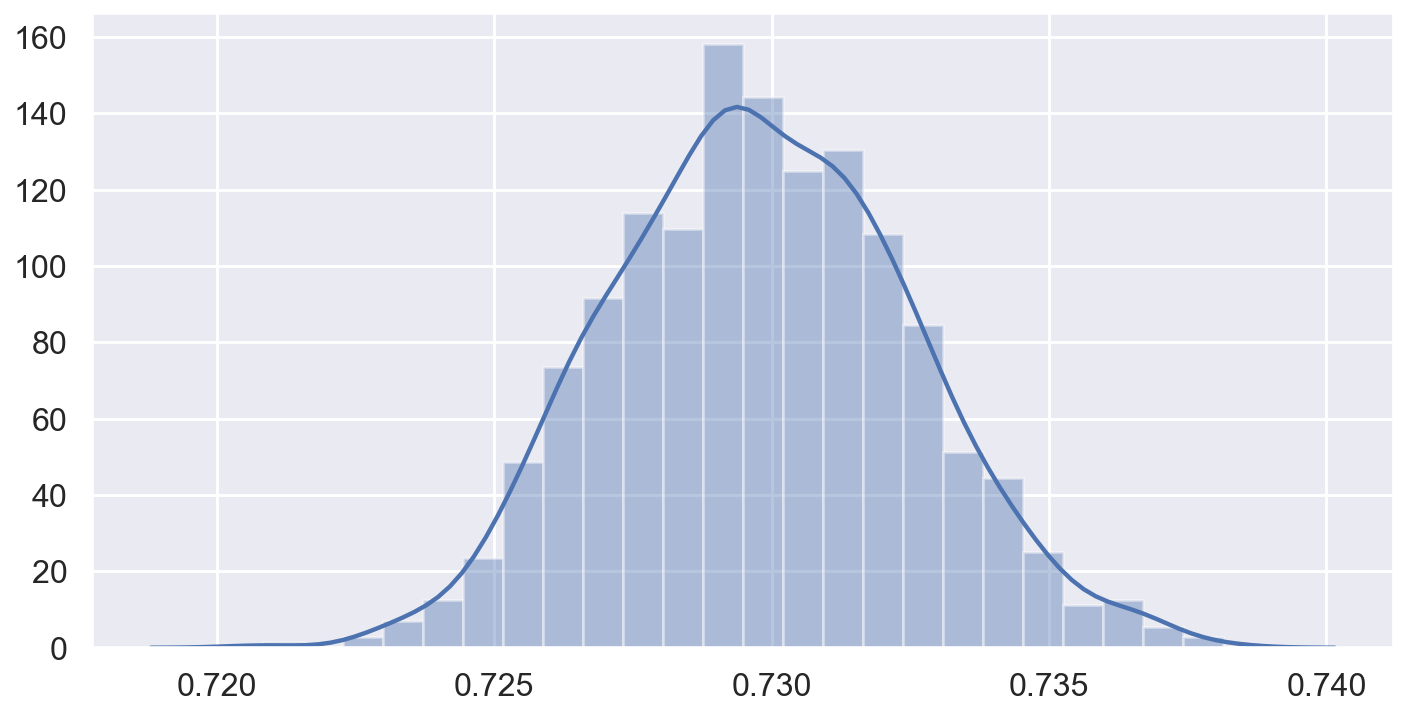

In [6]:
plt.figure(figsize=(12,6), dpi=140)
sns.distplot(r3)

### 1. A friend find a coin on the ground, flips it, and gets six heads in a row and then one tails. Give the beta distribution that describes this. Use integration to determine the probability that the true rate of flipping heads is between 0.4 and 0.6, reflecting that the coin is reasonably fair.

In [38]:
a = 6
b = 1
p = [0.4, 0.6]

In [9]:
beta.sf(x=p, a=a, b=b)

array([0.995904, 0.953344])

In [10]:
beta.sf(x=p, a=a, b=b)[0] - beta.sf(x=p, a=a, b=b)[1] 

0.04256000000000004

### 2. Come up with a prior probability that the coin is fair. Use a beta distribution such that there is at least a 95 percent chance that the true rate of flipping heads is between 0.4 and 0.6.

In [39]:
# Author suggested these values in his solutions
a2 = 55   
b2 = 55

In [40]:
ac = a + a2
bc = b + b2

In [41]:
beta.sf(x=p, a=ac, b=bc)

array([0.99592761, 0.0431807 ])

In [42]:
beta.sf(x=p, a=ac, b=bc)[0] - beta.sf(x=p, a=ac, b=bc)[1]

0.9527469094270735

Well, considering a prior data of flipping 203 heads and 197 tails, we now have over 99% chances of this coin being fair.

### 3. Now see how many more heads (with no more tails) it would take to convince you that there is reasonable chance that the coin is not fair. In this case, let's say that this means that our belief in the rate of the coing being between 0.4 and 0.6 drops below 0.5.

In [43]:
# We will now change likelihood
a = 6 + 23   # adding 23 heads
b = 1

In [44]:
ac = a + a2
bc = b + b2

In [45]:
beta.sf(x=p, a=ac, b=bc)[0] - beta.sf(x=p, a=ac, b=bc)[1]

0.4954058980753927

There we go, below 50%!